In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

%matplotlib inline
import matplotlib.pyplot as plt

# Section 1: Introduction and Data Analysis and Visualizations


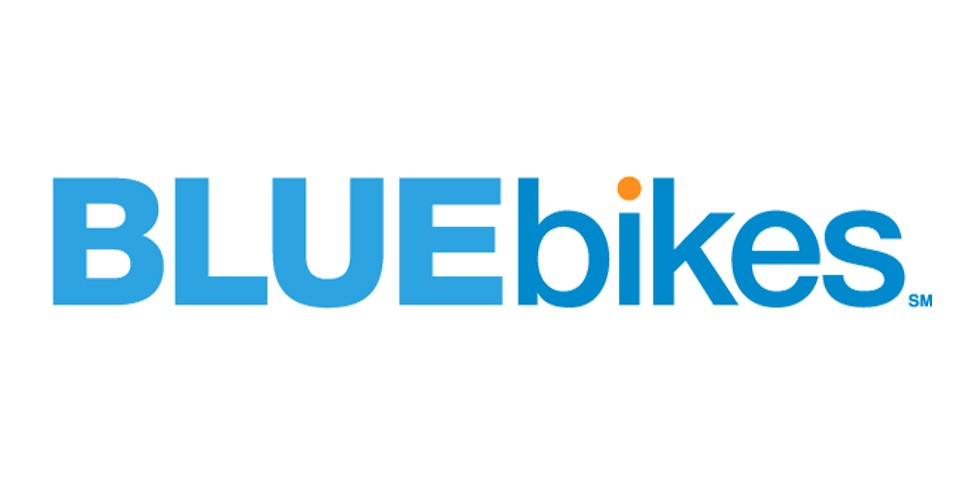

Before starting with the analysis of the data, the problem and the company whose service will be studied will be introduced. BlueBikes is the company in charge of the bike sharing service in the city of Boston. It counts with more than 4,000 bikes and 400 stations around the city . They offer different memberships for their business or single trip prices. 

## 1.1 Data Analysis

In [2]:
data = pd.read_csv('BikeSharing_Bluebikes2022.csv')

## 1.2 Visualizations:

For later needs, the map of stations by location is plotted below:

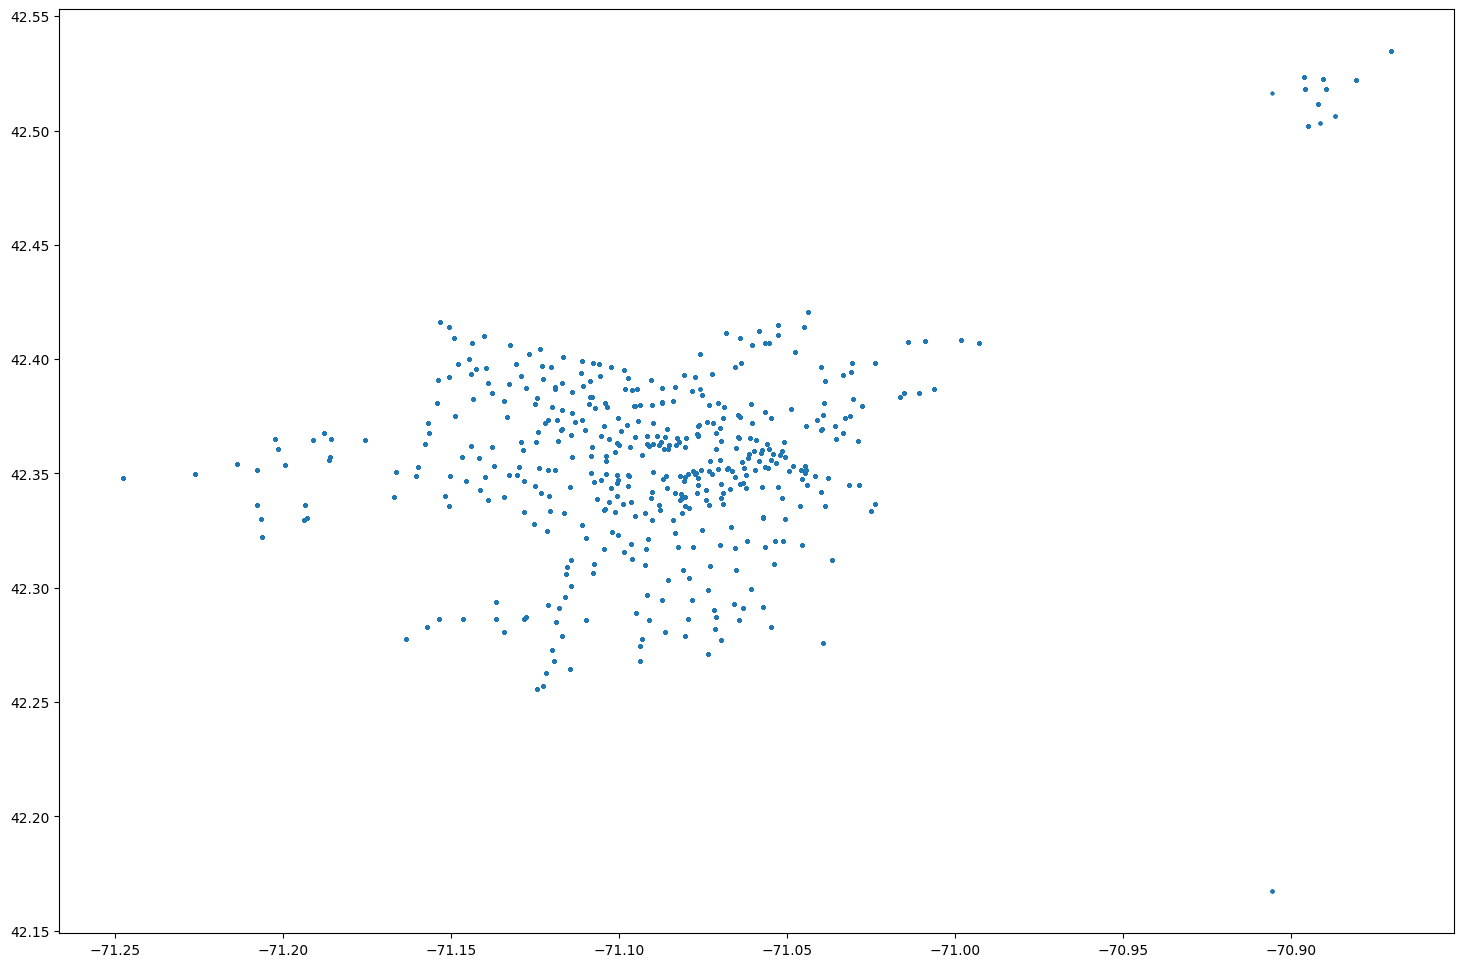

In [3]:
plt.figure(figsize=(18, 12))
plt.scatter(data['start station longitude'], data['start station latitude'],s=3)

# Section 2: Prediction Challenge

# Section 3: Exploratory Component

Once that the prediction has been made, the next task will be addressing the main target of this project: How can we make emission-free transport systems more efficient and attractive? In order to do so, new data will be introduced into the model and merged with the previous one to help answer the following questions. Note that the main focus of these questions will also be responding to when and where:
* **How weather and holidays affect the bike traffic**: Boston’s harsh weather is nothing new and it is something to keep in mind when managing a mean of transport which presumable is pretty affected by this variable. Something similar happens with national holidays. Knowing how Bostonians react to weather conditions and resting time will make it easier to find solutions. 
* **How do you know which will be the end station based on the start station?** Without forgetting the previous data, one valuable question that will be addressed during this project is how to predict the destination of a user, given the departure station, among other variables. Once answered this question, the model could be use to balance the fleet of BlueBikes in Boston, improving the service given. 
* **Is the total number of stations the most optimal one?** Is there an option to reduce the number of stations in Boston while keeping the same service? Answering this questions could help BlueBikes cut costs by reducing the number of stations, and hence, reducing the maintenance costs of these stations. 
* **Reduce single trip prices based on weather conditions, day of the week or holidays**. Knowing when Bostonians choose the bike as their mean of transport is as important as knowing where they will do it. This could be applied by BlueBikes by modifying the price when the demand is lower to stimulate their business, and vice versa.  


## 3.1: Prepare Data

In [4]:
data_exp=pd.read_csv('BikeSharing_Bluebikes2022.csv')
data_exp.set_index('starttime')

,Unnamed: 0,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
starttime,,,,,,,,,,,,,,
2022-01-01 00:00:25.1660,0,597,2022-01-01 00:10:22.1920,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,4923,Subscriber,02139
2022-01-01 00:00:40.4300,1,411,2022-01-01 00:07:32.1980,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295,3112,Subscriber,02139
2022-01-01 00:00:54.8180,2,476,2022-01-01 00:08:51.6680,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,6901,Customer,02124
2022-01-01 00:01:01.6080,3,466,2022-01-01 00:08:48.2350,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,5214,Customer,02124
2022-01-01 00:01:06.0520,4,752,2022-01-01 00:13:38.2300,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,2214,Subscriber,02215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 23:59:44.9190,487196,591,2022-09-01 00:09:36.0490,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,-71.076793,6399,Subscriber,02139
2022-08-31 23:59:45.7290,487197,631,2022-09-01 00:10:17.2070,380,Mass Ave at Albany St,42.361358,-71.096703,381,Inman Square at Springfield St.,42.374267,-71.100265,8075,Subscriber,NaN
2022-08-31 23:59:48.6080,487198,521,2022-09-01 00:08:30.3250,150,State Street at Channel Center,42.344137,-71.052608,26,Washington St at Waltham St,42.341575,-71.068904,2880,Subscriber,02118


First of all, all the relevant data needs to be loaded, which includes the pickups information as well as the wheather data and national holidays dates, which will be added as a column with a binary value (1 indicating that the day is indeed a national holiday and 0 otherwise).
Once this is achieved, both dataframes will be merged by date. Since the nature of this problem calls for keeping each pickup as a separate instance in the dataframe, the merge will happen on the pickups data side.

### Holiday Data

In [5]:
nat_hol = ['2022-01-01','2022-01-17','2022-02-21','2022-04-17','2022-04-18','2022-05-08','2022-05-30','2022-06-19','2022-06-20','2022-07-04']

data_exp['is_Holiday'] = [ 1 if data_exp.iloc[i]['starttime'][0:10] in nat_hol else 0 for i in range(len(data_exp))]


### Weather Data

In [6]:
# Drop weather data that won't be used in the model
data_w = pd.read_csv("Boston 2022-01-01 to 2022-08-31.csv")
drop = ['dew', 'sunrise','sunset','moonphase','conditions', 'description','stations','sealevelpressure',
'windgust','severerisk', 'uvindex', 'solarenergy', 'solarradiation','preciptype','winddir','name']
data_w = data_w.drop(columns = drop)
data_w['datetime'] = pd.to_datetime(data_w['datetime'])

In [7]:
from datetime import datetime as dt

data_exp['starttime'] = pd.to_datetime(data_exp['starttime'], format='%Y-%m-%d %H:%M:%S')
data_exp['datetime'] = pd.to_datetime(data_exp['starttime']).dt.date
data_exp['datetime'] = pd.to_datetime(data_exp['datetime'])

data_merge = data_exp.merge(data_w, how='left', on='datetime')

In [8]:
data_merge.columns
data_merge = data_merge.drop(columns=(['Unnamed: 0']))

In [9]:
data_merge

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,icon
0,597,2022-01-01 00:00:25.166,2022-01-01 00:10:22.1920,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
1,411,2022-01-01 00:00:40.430,2022-01-01 00:07:32.1980,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
2,476,2022-01-01 00:00:54.818,2022-01-01 00:08:51.6680,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
3,466,2022-01-01 00:01:01.608,2022-01-01 00:08:48.2350,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
4,752,2022-01-01 00:01:06.052,2022-01-01 00:13:38.2300,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305730,591,2022-08-31 23:59:44.919,2022-09-01 00:09:36.0490,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305731,631,2022-08-31 23:59:45.729,2022-09-01 00:10:17.2070,380,Mass Ave at Albany St,42.361358,-71.096703,381,Inman Square at Springfield St.,42.374267,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305732,521,2022-08-31 23:59:48.608,2022-09-01 00:08:30.3250,150,State Street at Channel Center,42.344137,-71.052608,26,Washington St at Waltham St,42.341575,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305733,5908,2022-08-31 23:59:58.665,2022-09-01 01:38:27.4930,105,Lower Cambridgeport at Magazine St / Riverside Rd,42.357219,-71.113872,374,Tremont St at Hamilton Pl,42.356683,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain


### Weather, Holiday and weekday merged data

Below, both weather and holiday data is merged and group by date. Also, we transform the data so the total number of pickups for each day is added to the data:

In [11]:
#Weather and holiday data merged: 
from datetime import date
group=pd.DataFrame(data_merge.groupby([data_merge['datetime'].dt.year,data_merge['datetime'].dt.month,data_merge['datetime'].dt.day]).datetime.count())
group
group.index[1]
dic = {}
for i in range(len(group)):
    dic[date(*group.index[i])] = group.values[i][0]


df = pd.DataFrame(dic, index=[0])
df = df.T
df['datetime'] = df.index
df['datetime'] = pd.to_datetime(df['datetime'])


In [12]:
merge = data_w.merge(df, on='datetime', how='inner')
merge = merge.rename(columns = {0 : 'pickups'})
merge['is_Holiday'] = [ 1 if str(merge.iloc[i]['datetime'])[0:10] in nat_hol else 0 for i in range(len(merge))]
merge

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,icon,pickups,is_Holiday
0,2022-01-01,10.7,6.8,8.3,10.7,5.0,7.6,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain,2123,1
1,2022-01-02,7.9,1.1,6.1,7.3,-3.5,3.6,90.0,5.814,100,50.00,0.0,0.0,27.5,95.1,7.3,rain,1940,0
2,2022-01-03,0.6,-5.0,-2.8,-4.7,-12.4,-9.2,52.0,0.000,0,0.00,0.0,0.0,28.9,94.9,16.0,cloudy,2624,0
3,2022-01-04,-0.6,-8.3,-4.5,-3.9,-16.3,-10.0,43.2,0.000,0,0.00,0.0,0.0,23.8,26.8,16.0,partly-cloudy-day,2686,0
4,2022-01-05,10.6,-3.1,5.0,10.6,-8.3,1.9,84.1,3.209,100,29.17,0.0,0.0,31.0,85.9,15.3,rain,2617,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2022-08-27,25.0,20.6,21.9,25.0,20.6,21.9,82.6,0.000,0,0.00,0.0,0.0,27.4,76.0,15.9,partly-cloudy-day,21555,0
238,2022-08-28,24.0,18.8,21.6,24.0,18.8,21.6,75.3,0.000,0,0.00,0.0,0.0,29.0,52.5,16.0,partly-cloudy-day,21985,0
239,2022-08-29,31.2,18.8,24.3,32.6,18.8,24.9,70.6,0.000,0,0.00,0.0,0.0,25.6,41.8,16.0,partly-cloudy-day,19600,0
240,2022-08-30,32.8,22.2,26.4,34.7,22.2,27.4,72.2,0.000,0,0.00,0.0,0.0,29.3,41.5,16.0,partly-cloudy-day,19911,0


### Day of the week

In [13]:
# Weekday added to the previous data
count = 6
merge['weekday'] = 0
for i in range(len(merge)):
    merge['weekday'][i] = count
    count +=1
    if count > 7:
        count = 1

merge

C:\Users\mirun\AppData\Local\Temp\ipykernel_10044\2525552396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['weekday'][i] = count


,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,icon,pickups,is_Holiday,weekday
0,2022-01-01,10.7,6.8,8.3,10.7,5.0,7.6,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain,2123,1,6
1,2022-01-02,7.9,1.1,6.1,7.3,-3.5,3.6,90.0,5.814,100,50.00,0.0,0.0,27.5,95.1,7.3,rain,1940,0,7
2,2022-01-03,0.6,-5.0,-2.8,-4.7,-12.4,-9.2,52.0,0.000,0,0.00,0.0,0.0,28.9,94.9,16.0,cloudy,2624,0,1
3,2022-01-04,-0.6,-8.3,-4.5,-3.9,-16.3,-10.0,43.2,0.000,0,0.00,0.0,0.0,23.8,26.8,16.0,partly-cloudy-day,2686,0,2
4,2022-01-05,10.6,-3.1,5.0,10.6,-8.3,1.9,84.1,3.209,100,29.17,0.0,0.0,31.0,85.9,15.3,rain,2617,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2022-08-27,25.0,20.6,21.9,25.0,20.6,21.9,82.6,0.000,0,0.00,0.0,0.0,27.4,76.0,15.9,partly-cloudy-day,21555,0,5
238,2022-08-28,24.0,18.8,21.6,24.0,18.8,21.6,75.3,0.000,0,0.00,0.0,0.0,29.0,52.5,16.0,partly-cloudy-day,21985,0,6
239,2022-08-29,31.2,18.8,24.3,32.6,18.8,24.9,70.6,0.000,0,0.00,0.0,0.0,25.6,41.8,16.0,partly-cloudy-day,19600,0,7
240,2022-08-30,32.8,22.2,26.4,34.7,22.2,27.4,72.2,0.000,0,0.00,0.0,0.0,29.3,41.5,16.0,partly-cloudy-day,19911,0,1


## 3.2 Exploratoration

### 3.2.1 Holiday Impact

In [14]:
mean_no_hol = merge.loc[merge['is_Holiday'] == 0].pickups.mean()
mean_hol = merge.loc[merge['is_Holiday'] == 1].pickups.mean()
weekend_mean = merge.loc[(merge['weekday'] == 5) | (merge['weekday'] == 6) | (merge['weekday'] == 7)].pickups.mean()
weekday_mean = merge.loc[(merge['weekday'] == 1) | (merge['weekday'] == 2) | (merge['weekday'] == 3) | (merge['weekday'] == 4)].pickups.mean()
print(weekend_mean, weekday_mean, mean_hol,mean_no_hol)


9294.903846153846 9703.369565217392 8186.2 9585.659482758621


<AxesSubplot: title={'center': 'pickups'}, xlabel='is_Holiday'>

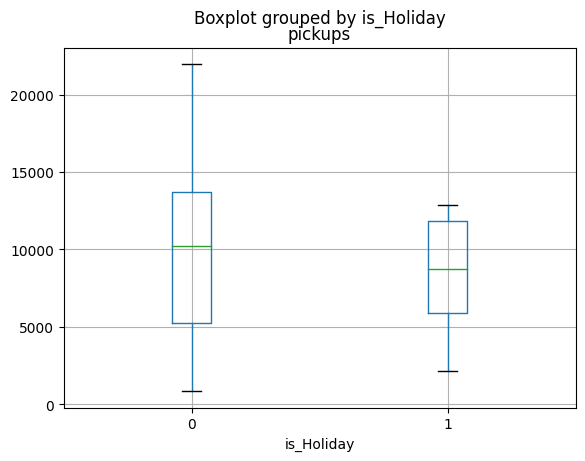

In [15]:
# merge.boxplot(merge[merge['is_Holiday'] == 1].pickups)
merge.boxplot(by='is_Holiday', column=['pickups'])

As seen on the boxplot above, the median pickups during holidays is reduced. Therefore, we could sugest to BlueBikes to reduce single trip prices during these days. 

### 3.2.2 Weekday Impact

<AxesSubplot: title={'center': 'pickups'}, xlabel='weekday'>

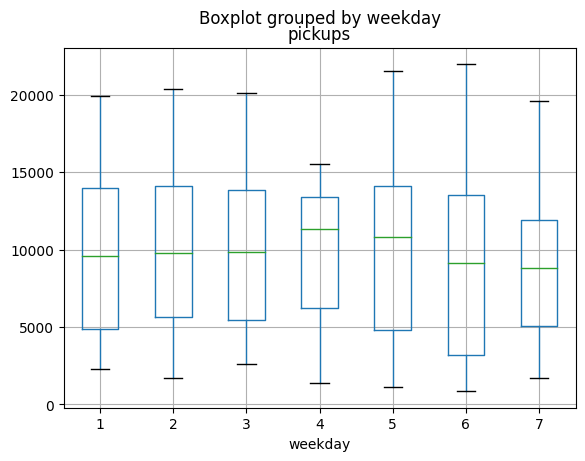

In [16]:
merge.boxplot(by='weekday', column=['pickups'])


A similar analysis as the one with holidays could be made with weekdays. Weekends (Saturdays and Sundays) present a lower median than the rest of weekdays with higher peak values compared with the 75 and 25 percentiles than the rest of weekdays. This means that:
* On Saturdays, there is more variation in pickup, meaning that it is the most volatile date.
* On Sundays, fewer people use bikes as their means of transport. 
* This boxplot shows that most people in Boston use BlueBikes for commuting or getting around before work.

Therefore, we could suggest new initiatives for BlueBike: 
* Create weekday membership packages with commuters in mind.
* Reduce the price on Sundays. 

### 3.2.3 Correlation Matrix

C:\Users\mirun\AppData\Local\Temp\ipykernel_10044\3816422069.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merge.corr()


<AxesSubplot: >

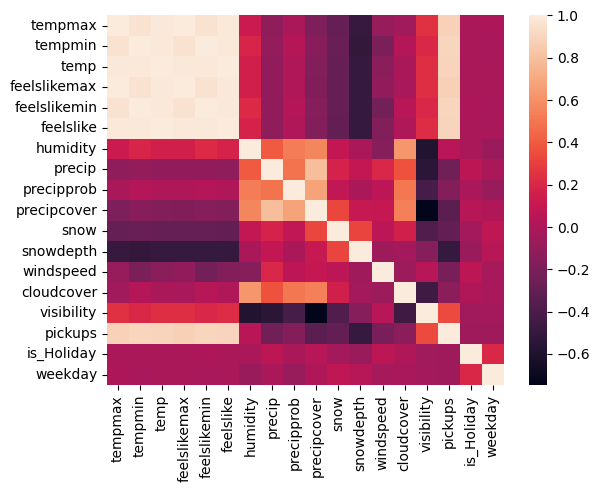

In [18]:
import seaborn as sns
corr = merge.corr()
sns.heatmap(corr)


###  3.2.4 Cluster of Stations

In [20]:
data_merge.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code', 'is_Holiday', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'humidity', 'precip',
       'precipprob', 'precipcover', 'snow', 'snowdepth', 'windspeed',
       'cloudcover', 'visibility', 'icon'],
      dtype='object')

In [21]:
data_merge

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,icon
0,597,2022-01-01 00:00:25.166,2022-01-01 00:10:22.1920,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
1,411,2022-01-01 00:00:40.430,2022-01-01 00:07:32.1980,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
2,476,2022-01-01 00:00:54.818,2022-01-01 00:08:51.6680,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
3,466,2022-01-01 00:01:01.608,2022-01-01 00:08:48.2350,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
4,752,2022-01-01 00:01:06.052,2022-01-01 00:13:38.2300,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305730,591,2022-08-31 23:59:44.919,2022-09-01 00:09:36.0490,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305731,631,2022-08-31 23:59:45.729,2022-09-01 00:10:17.2070,380,Mass Ave at Albany St,42.361358,-71.096703,381,Inman Square at Springfield St.,42.374267,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305732,521,2022-08-31 23:59:48.608,2022-09-01 00:08:30.3250,150,State Street at Channel Center,42.344137,-71.052608,26,Washington St at Waltham St,42.341575,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305733,5908,2022-08-31 23:59:58.665,2022-09-01 01:38:27.4930,105,Lower Cambridgeport at Magazine St / Riverside Rd,42.357219,-71.113872,374,Tremont St at Hamilton Pl,42.356683,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain


In [22]:
##data management
data_stations = data_merge.copy()
coordinates = data_stations[['start station longitude', 'start station latitude','start station id']]
coordinates

,start station longitude,start station latitude,start station id
0,-71.101295,42.359573,178
1,-71.084955,42.362428,189
2,-71.064608,42.375603,94
3,-71.064608,42.375603,94
4,-71.105301,42.347241,19
...,...,...,...
2305730,-71.093198,42.358100,67
2305731,-71.096703,42.361358,380
2305732,-71.052608,42.344137,150
2305733,-71.113872,42.357219,105


In [23]:
len(coordinates['start station latitude'].unique())

460

In [24]:
from sklearn.cluster import KMeans

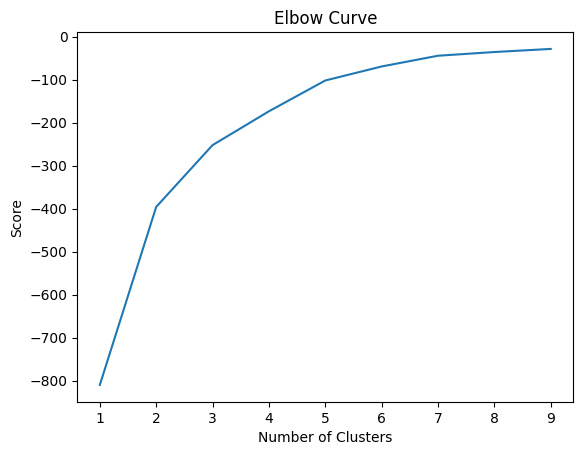

In [25]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = coordinates[['start station latitude']]
X_axis = coordinates[['start station longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(coordinates) # Compute k-means clustering.
coordinates['cluster_label'] = kmeans.fit_predict(coordinates)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

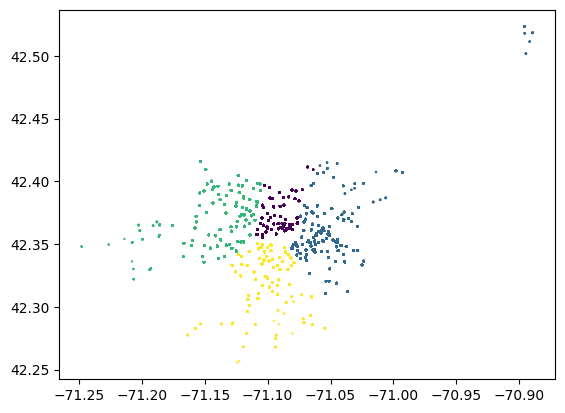

In [ ]:
plt.scatter(coordinates['start station longitude'],coordinates['start station latitude'], c=kmeans.labels_, s=0.5)

Using the elbow method to calculate the number of clusters needed (k=4), we can group the stations by pickups and location. This means that BlueBike could combine some of the cluster stations, resulting in fewer stations but a larger network. Therefore, BlueBikes could reduce maintenance costs.

### 3.2.5 Dimensionality reduction/Cluster

The high dimensionality of our dataset, having combined the wheather data, makes dimensionality reduction highly useful tool to apply.


In [28]:
from sklearn import decomposition
pca=decomposition.PCA()


We will start with dropping those columns which are of no use to our study, or are highly correlated with other variables which are included in the dataset.

In [29]:
data_merge.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code', 'is_Holiday', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'humidity', 'precip',
       'precipprob', 'precipcover', 'snow', 'snowdepth', 'windspeed',
       'cloudcover', 'visibility', 'icon'],
      dtype='object')

In [30]:
col_drop=['start station id', 'end station id', 'stoptime', 'start station name','end station name','postal code', 'bikeid','icon','datetime']
data_merge = data_merge.drop(columns=col_drop)

In [31]:
data_merge = data_merge.set_index('starttime')

There is only one variable that needs a dummy translation:

In [32]:
data_merge = pd.get_dummies(data_merge, columns=['usertype'])

In [33]:
data_clustering = data_merge.copy()
data_clustering.columns

Index(['tripduration', 'start station latitude', 'start station longitude',
       'end station latitude', 'end station longitude', 'is_Holiday',
       'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow',
       'snowdepth', 'windspeed', 'cloudcover', 'visibility',
       'usertype_Customer', 'usertype_Subscriber'],
      dtype='object')

Most of them, however, are in different scales with respect to each other and follow a normal distribution pattern, meaning that they must be standardized.

In [34]:
col_std = ['tripduration', 'start station latitude', 'start station longitude',
       'end station latitude', 'end station longitude', 
       'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow',
       'snowdepth', 'windspeed', 'cloudcover', 'visibility']

data_clustering[col_std]= (data_clustering[col_std] - data_clustering[col_std].mean()) / data_clustering[col_std].std()
data_clustering

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,is_Holiday,tempmax,tempmin,temp,feelslikemax,...,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,usertype_Customer,usertype_Subscriber
starttime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:25.166,-0.045072,0.064725,-0.398505,0.797121,-1.011867,1,-1.221514,-0.745320,-1.045194,-1.077116,...,-0.016212,1.310643,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,0,1
2022-01-01 00:00:40.430,-0.052832,0.217052,0.176596,0.069718,-0.404997,1,-1.221514,-0.745320,-1.045194,-1.077116,...,-0.016212,1.310643,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,0,1
2022-01-01 00:00:54.818,-0.050120,0.920095,0.892718,0.842617,1.227067,1,-1.221514,-0.745320,-1.045194,-1.077116,...,-0.016212,1.310643,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,1,0
2022-01-01 00:01:01.608,-0.050538,0.920095,0.892718,0.842617,1.227067,1,-1.221514,-0.745320,-1.045194,-1.077116,...,-0.016212,1.310643,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,1,0
2022-01-01 00:01:06.052,-0.038605,-0.593338,-0.539508,-0.318672,-1.196271,1,-1.221514,-0.745320,-1.045194,-1.077116,...,-0.016212,1.310643,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 23:59:44.919,-0.045322,-0.013887,-0.113532,0.468129,0.455297,0,0.817818,1.063205,0.898521,0.773319,...,2.066967,1.310643,0.885671,-0.118138,-0.218786,0.413943,-0.723590,0.373149,0,1
2022-08-31 23:59:45.729,-0.043653,0.159984,-0.236885,0.850191,-0.368833,0,0.817818,1.063205,0.898521,0.773319,...,2.066967,1.310643,0.885671,-0.118138,-0.218786,0.413943,-0.723590,0.373149,0,1
2022-08-31 23:59:48.608,-0.048243,-0.758971,1.315068,-0.886277,0.732267,0,0.817818,1.063205,0.898521,0.773319,...,2.066967,1.310643,0.885671,-0.118138,-0.218786,0.413943,-0.723590,0.373149,0,1


We fit our data into the model and compute the amount of variables needed to explain 80% of the variance, which should be enough to be able to draw conclusions form the derived data.

In [35]:
pca.fit(data_clustering)

PCA()

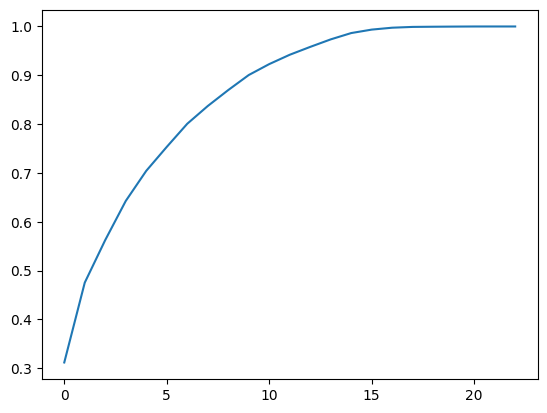

In [36]:
np.sum(pca.explained_variance_ratio_)
expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.plot(range(len(expl)), cdf)

Text(0.5, 1.0, 'cumsum(pca.explained_variance_ratio_)')

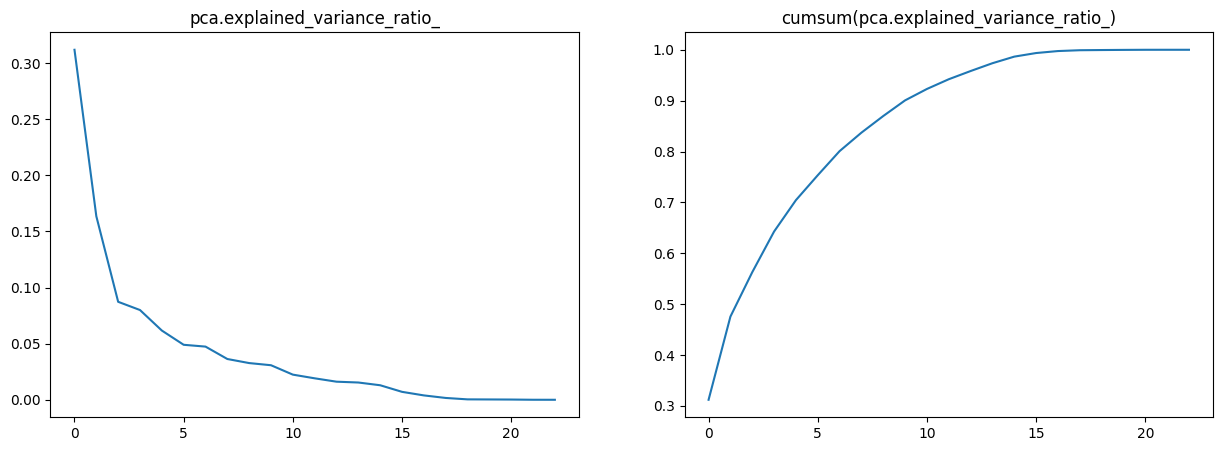

In [37]:
# Or more simple
fig=plt.figure(figsize=(15, 5))
ax1=fig.add_subplot(121)
ax1.plot(expl)
plt.title("pca.explained_variance_ratio_")

ax2=fig.add_subplot(122)
plt.plot(np.cumsum(expl))
plt.title("cumsum(pca.explained_variance_ratio_)")

In [38]:
num=np.where(np.cumsum(expl)>.8)[0][0]+1
print('The number of required vectors is %d' %num ,'to explain 80 percent of the variance') 

The number of required vectors is 7 to explain 80 percent of the variance


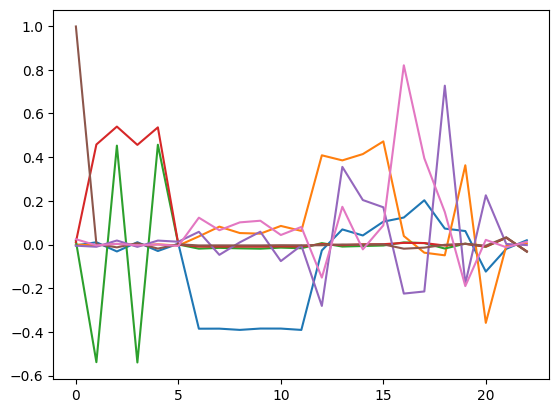

In [39]:
for eigenvector in pca.components_[:7]:
    plt.plot(range(len(eigenvector)), eigenvector)

In [40]:
pca_new=decomposition.PCA(n_components=7)
pca_new.fit(data_clustering)

PCA(n_components=7)

In [42]:
reduced=pca_new.transform(data_clustering)

In [43]:
data_pca = pd.DataFrame(data = pca_new.components_.round(3),
columns = data_clustering.columns.values,
index = ['comp1', 'comp2', 'comp3', 'comp4', 'comp5', 'comp6', 'comp7'])

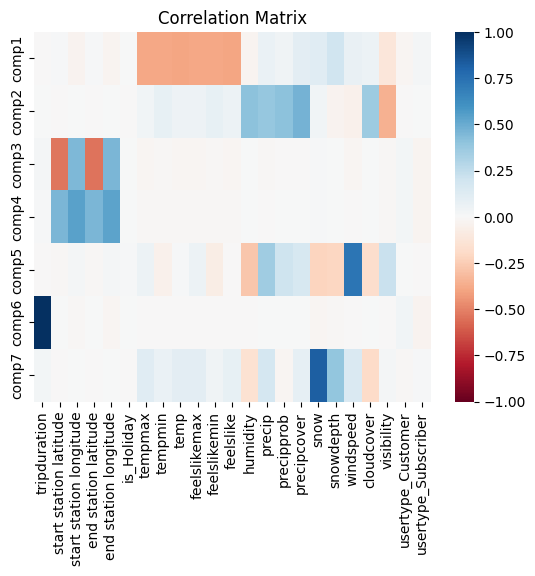

In [44]:
s = sns.heatmap(
    data_pca,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
)
plt.title('Correlation Matrix')
plt.show()

This correlation matrix is a great tool to interpret the results of our decomposition, as we can see which variables are more relevant to each eigenvector. For example, component 6 seems to be entirely determined by the duration of the trip, while component 7 is mainly determined by the snow feature

#### CLUSTERING

In this section, the reduced data will be clustered using Kmeans algorithm.
The elbow method will be used in order to determine the ideal amount of clusters needed for our study.

In [46]:
from sklearn.cluster import KMeans

In [47]:
## ELBOW METHOD
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(reduced)
    distortions.append(kmeanModel.inertia_)

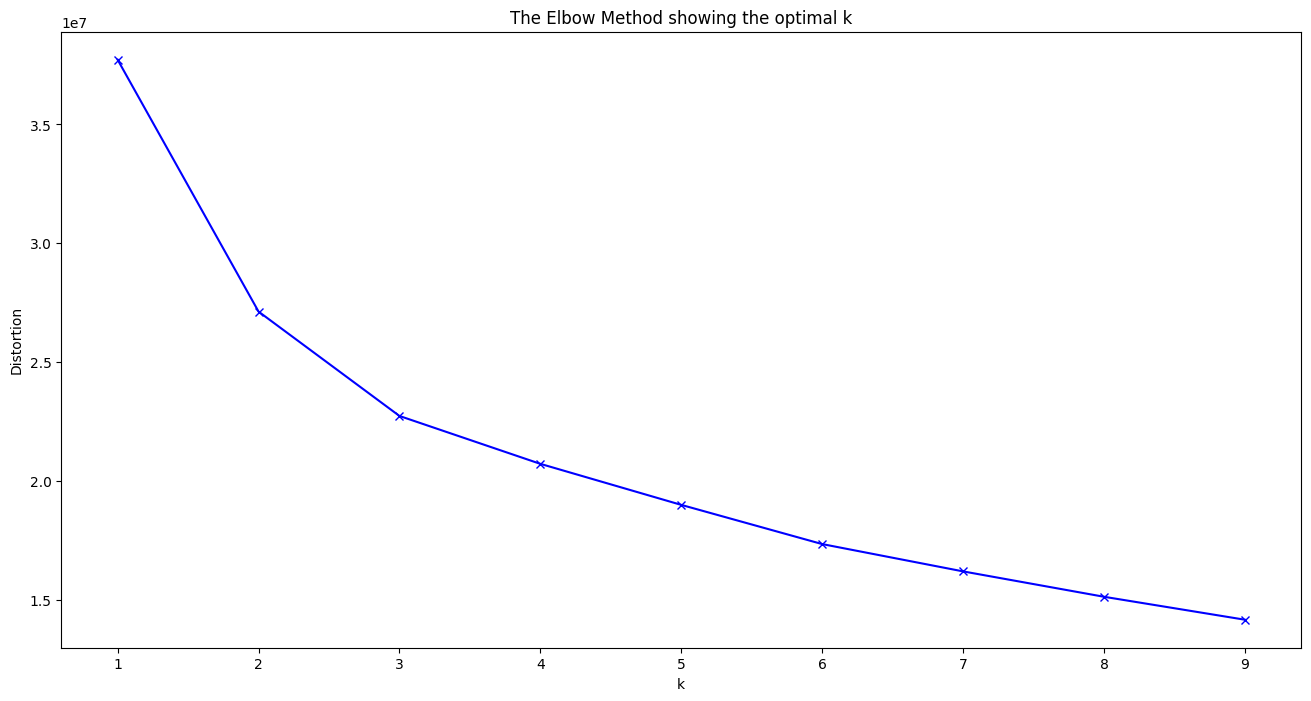

In [48]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [49]:
km = KMeans(n_clusters=3)
km.fit(reduced)

KMeans(n_clusters=3)

In [50]:
clustered = km.fit_predict(reduced)

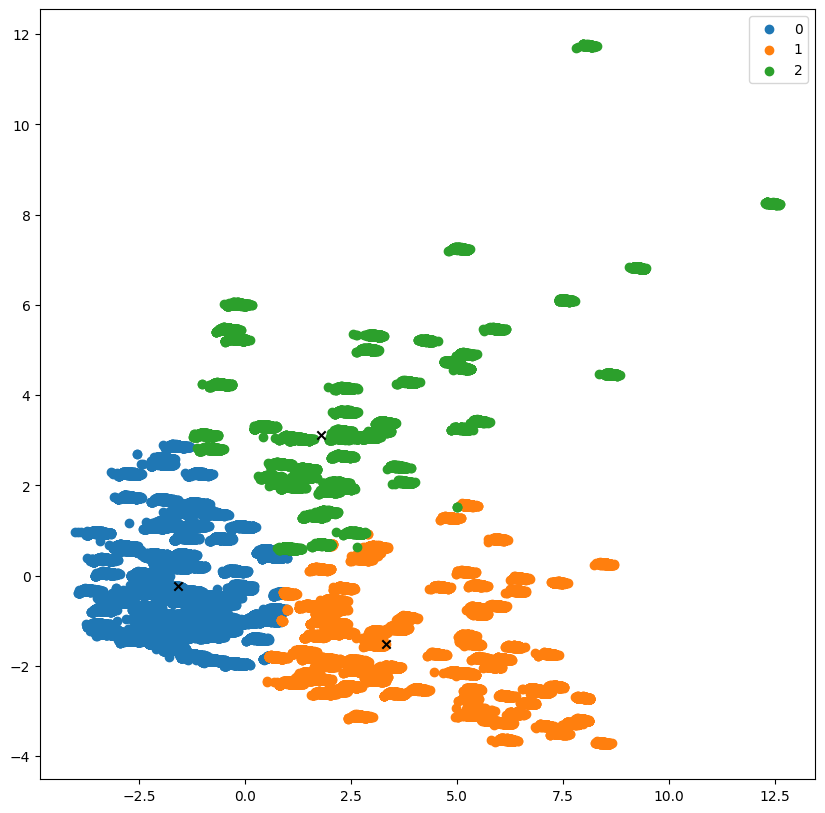

In [85]:
centroids = km.cluster_centers_
# plt.plot(centroids)
plt.figure(figsize=(10,10))
uniq = np.unique(clustered)
for i in uniq:
   plt.scatter( reduced[clustered == i , 0] , reduced[clustered == i , 1] , label = i)
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

Once clustered and plotted into the 2-dimensional space formed by the first two principal components (which are both highly correlated to precipitation data), we can see 3 distinct and separate clusters are formed from our analysis, encouraging further investigation of the features in the next section.

### 3.2.6 Clustering wheather icons

This subsection will attempt to visualize the effect of the feature 'icon' (representing the general wheather of the day) in the previously formed clusters and principal components.

In [52]:
data_pca_cl = data_clustering.copy()

In [54]:
data_pca_cl['cluster'] = clustered
data_pca_cl['cluster'].unique()

array([2, 1, 0])

In [55]:
data_icons_cl = data_exp.merge(data_w, how='left', on='datetime')


In [56]:
data_w_pca = data_icons_cl[['icon']]

In [57]:
data_w_pca.icon

0          rain
1          rain
2          rain
3          rain
4          rain
           ... 
2305730    rain
2305731    rain
2305732    rain
2305733    rain
2305734    rain
Name: icon, Length: 2305735, dtype: object

In [58]:
data_pca_cl = data_pca_cl.reset_index(drop=True)

In [59]:
data_pca_cl['i'] = data_w_pca.icon
data_pca_cl

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,is_Holiday,tempmax,tempmin,temp,feelslikemax,...,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,usertype_Customer,usertype_Subscriber,cluster,i
0,-0.045072,0.064725,-0.398505,0.797121,-1.011867,1,-1.221514,-0.745320,-1.045194,-1.077116,...,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,0,1,2,rain
1,-0.052832,0.217052,0.176596,0.069718,-0.404997,1,-1.221514,-0.745320,-1.045194,-1.077116,...,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,0,1,2,rain
2,-0.050120,0.920095,0.892718,0.842617,1.227067,1,-1.221514,-0.745320,-1.045194,-1.077116,...,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,1,0,2,rain
3,-0.050538,0.920095,0.892718,0.842617,1.227067,1,-1.221514,-0.745320,-1.045194,-1.077116,...,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,1,0,2,rain
4,-0.038605,-0.593338,-0.539508,-0.318672,-1.196271,1,-1.221514,-0.745320,-1.045194,-1.077116,...,1.958670,-0.118138,-0.218786,-2.555912,1.670223,-6.783122,0,1,2,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305730,-0.045322,-0.013887,-0.113532,0.468129,0.455297,0,0.817818,1.063205,0.898521,0.773319,...,0.885671,-0.118138,-0.218786,0.413943,-0.723590,0.373149,0,1,0,rain
2305731,-0.043653,0.159984,-0.236885,0.850191,-0.368833,0,0.817818,1.063205,0.898521,0.773319,...,0.885671,-0.118138,-0.218786,0.413943,-0.723590,0.373149,0,1,0,rain
2305732,-0.048243,-0.758971,1.315068,-0.886277,0.732267,0,0.817818,1.063205,0.898521,0.773319,...,0.885671,-0.118138,-0.218786,0.413943,-0.723590,0.373149,0,1,0,rain
2305733,0.176516,-0.060925,-0.841159,-0.083778,0.986399,0,0.817818,1.063205,0.898521,0.773319,...,0.885671,-0.118138,-0.218786,0.413943,-0.723590,0.373149,0,1,0,rain


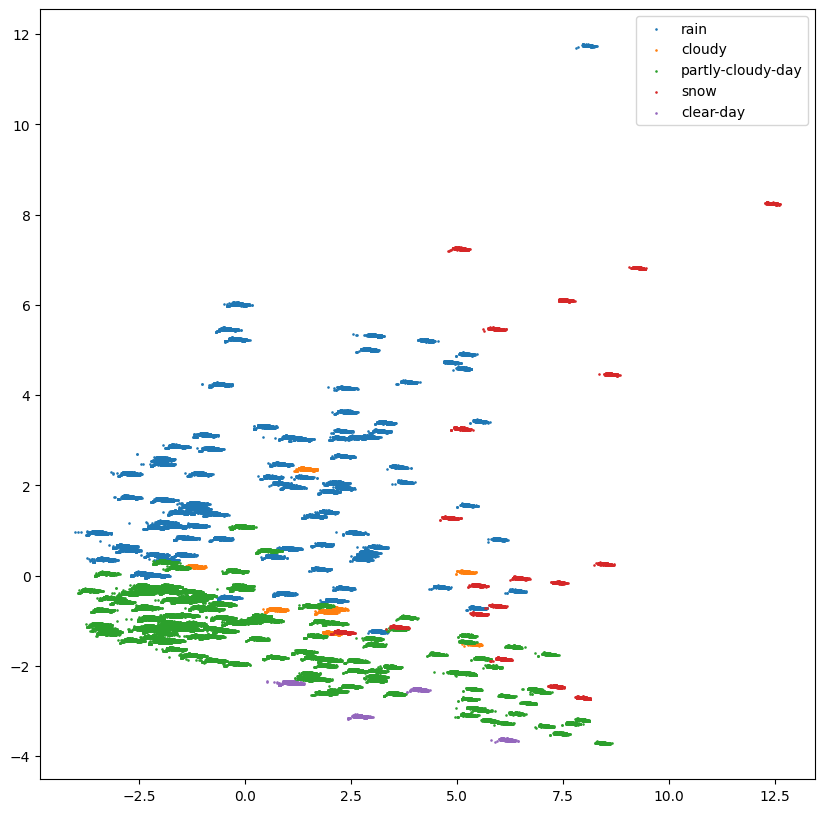

In [86]:
plt.figure(figsize=(10,10))
uniq = np.unique(clustered)
lab = data_pca_cl['i'].unique()

for j in lab:
   plt.scatter( reduced[data_pca_cl['i'] == j , 0] , reduced[data_pca_cl['i'] == j  , 1] , label = j, s=0.75)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

As we can see from this brief study into the effects of general weather conditions, there are clear patterns in most of the options for our variable 'icon' when plotted in the 2 PC space.
We can conclude that general weather is a good indicator of bike pickups except for when it is snowing, since our model can not pick up a clear cluster for those observations. 
This is coherent with our previous observation that neither of the first two PC are correlated with the feature snow.


## 3.3 Neural Network

### 3.3.1 DATA PREPARATION

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

This part of the exploratory comoponent will try to answer the question: can the end station of a trip be predicted starting from a single known station?
It is our belief that this is a hugely interesting topic to inverstigate, which will be done through two of the techniques learnt during the course: neural networks and a Tree Forest Classifier. 

First of all, all the relevant data needs to be loaded, which includes the pickups information as well as the wheather data and national holidays dates, which will be added as a column with a binary value (1 indicating that the day is indeed a national holiday and 0 otherwise).
Once this is achieved, both dataframes will be merged by date. Since the nature of this problem calls for keeping each pickup as a separate instance in the dataframe, the merge will happen on the pickups data side.


In [ ]:
data_exp=pd.read_csv('BikeSharing_Bluebikes2022.csv')
nat_hol = ['2022-01-01','2022-01-17','2022-02-21','2022-04-17','2022-04-18','2022-05-08','2022-05-30','2022-06-19','2022-06-20','2022-07-04']

data_exp['is_Holiday'] = [ 1 if data_exp.iloc[i]['starttime'][0:10] in nat_hol else 0 for i in range(len(data_exp))]


As we have seen before, there is data in the wheather dataframe which is highly correlated with each other, like 'temp' and 'tempmax' for example, while others are not relevant at all to our study. All of these features will be dropped.

In [ ]:
data_w = pd.read_csv("Boston 2022-01-01 to 2022-08-31.csv")
drop = ['dew', 'sunrise','sunset','moonphase','conditions', 'description','stations','sealevelpressure',
'windgust','severerisk', 'uvindex', 'solarenergy', 'solarradiation','preciptype','winddir','name'
,'tempmax', 'tempmin','feelslikemax', 'feelslikemin','precipprob', 'precipcover']
data_w = data_w.drop(columns = drop)
data_w['datetime'] = pd.to_datetime(data_w['datetime'])

In [ ]:
from datetime import datetime as dt

data_exp['starttime'] = pd.to_datetime(data_exp['starttime'], format='%Y-%m-%d %H:%M:%S')
data_exp['datetime'] = pd.to_datetime(data_exp['starttime']).dt.date
data_exp['datetime'] = pd.to_datetime(data_exp['datetime'])

data_merge = data_exp.merge(data_w, how='left', on='datetime')

In [ ]:
data_merge.columns
data_merge = data_merge.drop(columns=(['Unnamed: 0']))

In [ ]:
data_merge.columns


Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code', 'is_Holiday', 'datetime', 'temp', 'feelslike',
       'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover',
       'visibility', 'icon'],
      dtype='object')

In [ ]:
data_merge['start station id']

0          178
1          189
2           94
3           94
4           19
          ... 
2305730     67
2305731    380
2305732    150
2305733    105
2305734    560
Name: start station id, Length: 2305735, dtype: int64

In order to conduct a coherent study, we need to choose the start station with sufficient data, which means counting the instances of each start station and creating a new dataframe including only those from the most repeated one.

In [ ]:
list = []
for i in data_merge['start station id'].unique():
    count = data_merge[data_merge['start station id']==i].count()[0]
    list.append(count)

maxim = data_merge['start station id'].unique()[list.index(max(list))]
print(maxim)
data_merge[data_merge['start station id']==maxim].count()[0]



67


49127

In this case, station 67 happens to be the most frequent, with a total count of almost fifty thousand data points.

In [ ]:
data_merge[data_merge['start station id']!=67]['start station id'].mode()

0    68
Name: start station id, dtype: int64

Since this data will be sliced further in this notebook, we are also going to include the second most frequent start station, which is number 68

In [ ]:
data_merge[data_merge['start station id']==68].count()[0]

40999

In [ ]:
data_merge = data_merge[data_merge['start station id'].isin([67,68])]

In [ ]:
data_merge['start station id']

33         68
35         68
56         68
62         67
67         68
           ..
2305598    67
2305608    67
2305623    67
2305661    67
2305730    67
Name: start station id, Length: 90126, dtype: int64

It is also important to investigate how balanced our data is, since having a couple of end stations with a huge number of entries can lead to unclear prediction models.

In [ ]:
dic_stations = {}
for i in data_merge['end station id']:
    if str(i) in dic_stations.keys():
        dic_stations[str(i)] +=1
    else:
        dic_stations[str(i)] = 1

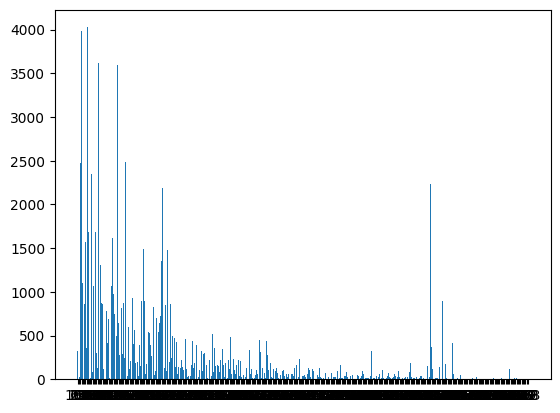

In [ ]:
plot = plt.bar(*zip(*dic_stations.items()))
plt.show()

As we can see in the plot above, most of the stations have very few pickups to be relevant in this study, since it would result in an inaccurate model due to underfitting. Thus, this test case will focus on those stations that have over 2300 different data points. 

In [ ]:
excluded_stations = []
for i in data_merge['end station id'].unique():
    count = data_merge[data_merge['end station id']==i].count()[0]
    if 2300 < count :
        continue
    else:
        excluded_stations.append(i)

print(len(excluded_stations),len(data_merge['end station id'].unique()))

359 366


As a result of this exploration, all but 7 stations and their respective data will be eliminated from the dataset

In [ ]:
data_merge = data_merge[~data_merge['end station id'].isin(excluded_stations)]

In [ ]:
len(data_merge['end station id'].unique())

7

In [ ]:
data_merge['end station id'].unique()

array([107,  67, 178, 471,  68, 179,  74], dtype=int64)

Next, we also need to get rid of the unnecessary features coming from the pickups file, including the start station id since they are all from the same station now.

In [ ]:
data_merge.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'postal code', 'is_Holiday', 'datetime', 'temp', 'feelslike',
       'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover',
       'visibility', 'icon'],
      dtype='object')

In [ ]:
data_nn = data_merge.drop(columns=[
       'start station name', 'start station latitude',
       'start station longitude','end station name',
       'end station latitude', 'end station longitude','bikeid','postal code', 'stoptime'])

In [ ]:
data_nn

,tripduration,starttime,start station id,end station id,usertype,is_Holiday,datetime,temp,feelslike,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,icon
56,509,2022-01-01 00:27:40.984,68,107,Subscriber,1,2022-01-01,8.3,7.6,98.2,1.225,0.0,0.0,11.0,100.0,3.0,rain
62,2209,2022-01-01 00:29:15.682,67,67,Subscriber,1,2022-01-01,8.3,7.6,98.2,1.225,0.0,0.0,11.0,100.0,3.0,rain
150,320,2022-01-01 01:18:18.033,68,178,Subscriber,1,2022-01-01,8.3,7.6,98.2,1.225,0.0,0.0,11.0,100.0,3.0,rain
333,387,2022-01-01 03:31:04.764,68,178,Subscriber,1,2022-01-01,8.3,7.6,98.2,1.225,0.0,0.0,11.0,100.0,3.0,rain
377,204,2022-01-01 03:56:38.414,67,471,Subscriber,1,2022-01-01,8.3,7.6,98.2,1.225,0.0,0.0,11.0,100.0,3.0,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305014,228,2022-08-31 23:29:02.443,67,471,Subscriber,0,2022-08-31,25.0,25.0,63.1,8.351,0.0,0.0,31.6,49.3,16.0,rain
2305157,529,2022-08-31 23:35:22.510,68,471,Subscriber,0,2022-08-31,25.0,25.0,63.1,8.351,0.0,0.0,31.6,49.3,16.0,rain
2305276,494,2022-08-31 23:40:14.734,68,179,Subscriber,0,2022-08-31,25.0,25.0,63.1,8.351,0.0,0.0,31.6,49.3,16.0,rain
2305566,356,2022-08-31 23:52:55.882,67,179,Subscriber,0,2022-08-31,25.0,25.0,63.1,8.351,0.0,0.0,31.6,49.3,16.0,rain


Our data is looking like this at the moment. There are obvious steps to be taken before training of any kind can begin to occur: 
First of all, the time in which those pickups happen can not be a simple date since it can not be picked up by models. Therefore, we have decided to transform the time of the pickup into a new variable expressing the time of day in which the pickup happened. The division will happen every six hours into morning, afternoon, evening and night. These are really valuable information and more importantly, usable by getting their dummies.
Once this is done, both columns indicating the date and time of the pickup can be dropped from the dataframe.

In [ ]:
data_nn['time_of_day'] = 0
for i in range(len(data_nn)):
    if (data_nn['starttime'].iloc[i].hour >= 7) & (data_nn['starttime'].iloc[i].hour < 12):
        data_nn['time_of_day'].iloc[i] = 'morning'
    elif (data_nn['starttime'].iloc[i].hour >= 12) & (data_nn['starttime'].iloc[i].hour < 17):
        data_nn['time_of_day'].iloc[i] = 'afternoon'
    elif (data_nn['starttime'].iloc[i].hour >= 17) & (data_nn['starttime'].iloc[i].hour < 24):
        data_nn['time_of_day'].iloc[i] = 'evening'
    elif (data_nn['starttime'].iloc[i].hour >= 24) or (data_nn['starttime'].iloc[i].hour < 7):
        data_nn['time_of_day'].iloc[i] = 'night'


C:\Users\mirun\AppData\Local\Temp\ipykernel_3008\1358740847.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nn['time_of_day'].iloc[i] = 'night'


We have also added another variable indicating weather the pickup was produced during the weekend or otherwise, hoping that it will add valuable information to the models and result in a higher accuracy metrics.
The cutting point for weekend has been set at Friday evening, which we belief is more precise than setting it to saturday midnight.

In [ ]:
data_nn['is_weekend'] = 1  
weekday = 5 ## 2022 starts on a saturday
day = data_nn['starttime'].iloc[0].day
for i in range(1,len(data_nn)):
    data_nn['is_weekend'].iloc[i] = 1 if (
    data_nn['starttime'].iloc[i].weekday()) > 4 else 0
    if data_nn['starttime'].iloc[i].weekday() == 4 and data_nn['time_of_day'].iloc[i] == 'evening':
        data_nn['is_weekend'].iloc[i] = 1

C:\Users\mirun\AppData\Local\Temp\ipykernel_3008\1496866577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nn['is_weekend'].iloc[i] = 1 if (
C:\Users\mirun\AppData\Local\Temp\ipykernel_3008\1496866577.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nn['is_weekend'].iloc[i] = 1


Having extracted all the valuable data from the date columns in the form of weekend values and day of the week, we can now eliminate these columns that are unintelligible for our models.

In [ ]:
data_nn = data_nn.drop(columns=['starttime','datetime'])

Second step into getting the data ready for training is using dummy variables to codify those that are not numerical values. The time of day variable has already been discussed, but the icon variable and usertype, which define the general wheather for that day and the type of user (subscriber or customer) respectively, also need to be translated into dummy variables. Moreover, tbe column indicating the start station also needs to be converted.

In [ ]:
data_nn_dummies = pd.get_dummies(data_nn, columns=['time_of_day', 'icon', 'usertype','start station id'])

In [ ]:
data_nn_dummies_std = data_nn_dummies.copy()

In [ ]:
data_nn_dummies_std.columns

Index(['tripduration', 'end station id', 'is_Holiday', 'temp', 'feelslike',
       'humidity', 'precip', 'snow', 'snowdepth', 'windspeed', 'cloudcover',
       'visibility', 'is_weekend', 'time_of_day_afternoon',
       'time_of_day_evening', 'time_of_day_morning', 'time_of_day_night',
       'icon_clear-day', 'icon_cloudy', 'icon_partly-cloudy-day', 'icon_rain',
       'icon_snow', 'usertype_Customer', 'usertype_Subscriber',
       'start station id_67', 'start station id_68'],
      dtype='object')

Since most of our numerical features are using different scales, we need to standardize these columns. 
It is also important to remark that our dummy variables have not been standardized, since this would defeat the purpose of having binary values for each label.

In [ ]:
col_std = [ 'temp', 'feelslike','tripduration',
       'humidity', 'precip', 'snow', 'snowdepth',
       'windspeed', 'cloudcover', 'visibility']

data_nn_dummies_std[col_std]= (data_nn_dummies_std[col_std] - data_nn_dummies_std[col_std].mean()) / data_nn_dummies_std[col_std].std()

This classification problem is quite different form the ones seen in class before, since it is a multiclass classification problem. As such, even though our target variable (end station id) is an integer, it needs to be translated into a categorical variable. In other words, each station id will be converted into a new value, also an integer, so that the network can interpret them.

In [ ]:
uniques = (data_nn_dummies_std['end station id'].unique()).tolist()
uniques.sort()
data_nn_dummies_std['categorical_target'] = [uniques.index(data_nn_dummies_std['end station id'].iloc[i]) for i in range(len(data_nn_dummies_std))]


In [ ]:
data_nn_dummies_std = data_nn_dummies_std.drop(columns=['end station id'])

In [ ]:
target = data_nn_dummies_std['categorical_target']
data_nn_dummies_std = data_nn_dummies_std.drop(columns='categorical_target')


In [ ]:
data_nn_dummies_std = data_nn_dummies_std.reset_index(drop=True)
data_nn_dummies_std.head()

,tripduration,is_Holiday,temp,feelslike,humidity,precip,snow,snowdepth,windspeed,cloudcover,...,time_of_day_night,icon_clear-day,icon_cloudy,icon_partly-cloudy-day,icon_rain,icon_snow,usertype_Customer,usertype_Subscriber,start station id_67,start station id_68
0,-0.038138,1,-0.705509,-0.550967,2.493921,-0.04066,-0.158724,-0.286342,-2.441967,1.626172,...,1,0,0,0,1,0,0,1,0,1
1,0.319673,1,-0.705509,-0.550967,2.493921,-0.04066,-0.158724,-0.286342,-2.441967,1.626172,...,1,0,0,0,1,0,0,1,1,0
2,-0.077919,1,-0.705509,-0.550967,2.493921,-0.04066,-0.158724,-0.286342,-2.441967,1.626172,...,1,0,0,0,1,0,0,1,0,1
3,-0.063817,1,-0.705509,-0.550967,2.493921,-0.04066,-0.158724,-0.286342,-2.441967,1.626172,...,1,0,0,0,1,0,0,1,0,1
4,-0.102334,1,-0.705509,-0.550967,2.493921,-0.04066,-0.158724,-0.286342,-2.441967,1.626172,...,1,0,0,0,1,0,0,1,1,0


As you can see, we have achieved our goal of converting the target variable into its own categorical labels, ranging from 0 with the length of the list of end stations.

Finally, the data is ready to be split into training, validation and testing splits

In order to avoid continued trends in climate, we have decided to make our testing set larger than usual, which should avoid high variance in comparison to our training set.
Also worth noting, this dataset is limited in terms of obsevations, so our validation set should not be large as to include as many as possible in training.

In [ ]:
split = int(len(data_nn_dummies_std)*0.45)
split_val = int(len(data_nn_dummies_std)*0.55)
x_train = data_nn_dummies_std[:split]
y_train = target[:split]
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
x_val = data_nn_dummies_std[split: split_val]
y_val = target[split: split_val]
y_val = np.asarray(y_val).astype('float32').reshape((-1,1))

x_test = data_nn_dummies_std[split_val:]
y_test = target[split_val:]
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))


In [ ]:
print(len(x_train) ,len(x_test),len(x_train)+len(x_test) + len(x_val )== len(data_nn_dummies_std))

10140 10141 True


In [ ]:
num_features = x_train.shape[1]
num_output = len(target.unique())
num_output


7

In [ ]:
x_train

,tripduration,is_Holiday,temp,feelslike,humidity,precip,snow,snowdepth,windspeed,cloudcover,...,time_of_day_night,icon_clear-day,icon_cloudy,icon_partly-cloudy-day,icon_rain,icon_snow,usertype_Customer,usertype_Subscriber,start station id_67,start station id_68
0,-0.038138,1,-0.705509,-0.550967,2.493921,-0.040660,-0.158724,-0.286342,-2.441967,1.626172,...,1,0,0,0,1,0,0,1,0,1
1,0.319673,1,-0.705509,-0.550967,2.493921,-0.040660,-0.158724,-0.286342,-2.441967,1.626172,...,1,0,0,0,1,0,0,1,1,0
2,-0.077919,1,-0.705509,-0.550967,2.493921,-0.040660,-0.158724,-0.286342,-2.441967,1.626172,...,1,0,0,0,1,0,0,1,0,1
3,-0.063817,1,-0.705509,-0.550967,2.493921,-0.040660,-0.158724,-0.286342,-2.441967,1.626172,...,1,0,0,0,1,0,0,1,0,1
4,-0.102334,1,-0.705509,-0.550967,2.493921,-0.040660,-0.158724,-0.286342,-2.441967,1.626172,...,1,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,-0.025089,0,0.846100,0.814730,0.434981,-0.389054,-0.158724,-0.286342,0.474252,0.611216,...,0,0,0,1,0,0,0,1,1,0
10136,-0.049715,0,0.846100,0.814730,0.434981,-0.389054,-0.158724,-0.286342,0.474252,0.611216,...,0,0,0,1,0,0,0,1,0,1
10137,-0.095388,0,0.846100,0.814730,0.434981,-0.389054,-0.158724,-0.286342,0.474252,0.611216,...,0,0,0,1,0,0,0,1,0,1
10138,-0.068447,0,0.846100,0.814730,0.434981,-0.389054,-0.158724,-0.286342,0.474252,0.611216,...,0,0,0,1,0,0,0,1,1,0


### 3.3.2 TRAINING AND PREDICTIONS

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

As has been mentioned before, this test case is a multiclass classification problem, not a simple binary classification one. This has multiple implications: first of all, the output of our model will not be a single neuron, but the number of end stations we are trying to predict for. The loss function used for the model can't be binary crossentropy, since it is designed to tackle binary classification problems, but it will be sparse categorical crossentropy. Categorical crossentropy is also a viable option but would require extra data processing that can be skipped using the former, as well as making the target data less inuitive to read since it would be one-hot encoded into tensors, compared to our current output which is a simple integer in the range of 0 to the number of end stations.

In terms of the architecture of the neural network, we believe this is a very complex and unintuitive problem to solve, meaning that it is essencial to recognize as many patterns as possible.
For this reason, 3 hidden layers have been implemented, with the number of neurons getting higher in the first one in order to map our data into a higher-dimension space.
The weights have also been initialized with the uniform Glorot method to ensure that the variance of the weights is uniform across the first layer.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# define the keras model
model = Sequential()
model.add(Dense(200, input_shape = (x_train.shape[1],), activation='relu'
, kernel_initializer='glorot_uniform'),)

model.add(Dense(350, activation='softmax'))
model.add(Dense(150, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(num_output, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=40, batch_size=300, validation_data=(x_val,y_val))



Epoch 1/40
34/34 [==============================] - 1s 9ms/step - loss: 1.9151 - accuracy: 0.1851 - val_loss: 1.9273 - val_accuracy: 0.2055
Epoch 2/40
34/34 [==============================] - 0s 5ms/step - loss: 1.8880 - accuracy: 0.2032 - val_loss: 1.9137 - val_accuracy: 0.2082
Epoch 3/40
34/34 [==============================] - 0s 5ms/step - loss: 1.8322 - accuracy: 0.2434 - val_loss: 1.8556 - val_accuracy: 0.2583
Epoch 4/40
34/34 [==============================] - 0s 5ms/step - loss: 1.7943 - accuracy: 0.2699 - val_loss: 1.8340 - val_accuracy: 0.2654
Epoch 5/40
34/34 [==============================] - 0s 5ms/step - loss: 1.7755 - accuracy: 0.2762 - val_loss: 1.8016 - val_accuracy: 0.2867
Epoch 6/40
34/34 [==============================] - 0s 5ms/step - loss: 1.7556 - accuracy: 0.2898 - val_loss: 1.7673 - val_accuracy: 0.3245
Epoch 7/40
34/34 [==============================] - 0s 5ms/step - loss: 1.7331 - accuracy: 0.2984 - val_loss: 1.7532 - val_accuracy: 0.3213
Epoch 8/40
34/34 [==

In [ ]:
prediction = model.predict(x_test)

317/317 [==============================] - 0s 1ms/step


In [ ]:
loss, accuracy =  model.evaluate(x_test, y_test, verbose=0)

print("Accuracy   : {:5.2f} ".format(accuracy))

Accuracy   :  0.44 


In [ ]:
from sklearn.metrics import f1_score
prediction = np.argmax(model.predict(x_test), axis=-1)
f1_score(y_test, prediction, average=None)

317/317 [==============================] - 0s 1ms/step


array([0.35522664, 0.52560148, 0.50874404, 0.49231797, 0.51330351,
       0.37453936, 0.02085308])

<AxesSubplot: >

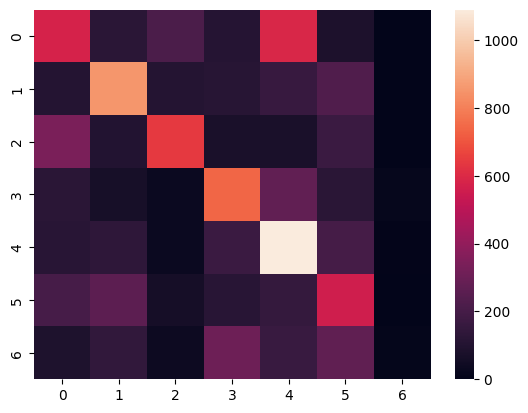

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,prediction))

After using our test data for predicting purposes, we can in the see the f-1 score for each end station and the confusion matrix that the model is relatively accurate given the complexity of the problem across most stations except for the last one, where we see an abnormaly low score in comparison. 

### 3.3.3 Random tree forest classifier


The last part of this challenge will be comparing our previously analyzed classifier with a DecisionTreeClassifier. Since this one only uses binary decision-making with respect to each feature and our problem is of a high complexity, it is expected to perform far worse than a Neural Network.
Implementing this classifier is trivial given that all the data preparation has already been done in the previous section

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_test,y_test)


0.3046050685336752

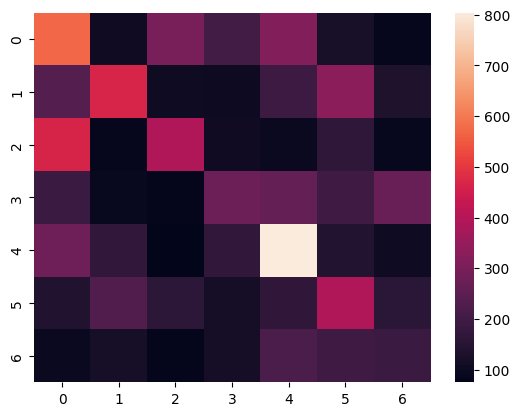

In [ ]:
ypred=dt.predict(x_test)
sns.heatmap(confusion_matrix(y_test, ypred))
plt.show()

In [ ]:
f1_score(y_test,ypred, average= None)

array([0.31078511, 0.33026874, 0.30382683, 0.22512235, 0.42326928,
       0.26915114, 0.18360334])

As can be seen in these metrics, the model perform far worse than the NN, which was expected.
However, the model's station per station metrics are quite different than the ones for the NN. For example, class 3 (corresponding to station 107) is predicted far worse than in the previous model, with class 6 being more accurate in relation to the average.

# Section 4: Conclusions

As part of our exploratory challenge, it can be concluded that general weather data is highly relevant to the study of bike pickups, as highlighted by the PCA and clustering analysis performed on the datasets.
Other included variables such as the national holidays and the day of the week also proved to be impactful. Not only is that the case in the general data exploration when comparing the values of each feature, but also in the Neural Network challenge where, especially the variable representing day of the week, it improved the models' predictions in a non-insignificant manner.
Finally, should also be remarked that the problem tackled in section 3.3 is highly complex and thus, results in a lower than ideal performance in all accuracy metrics. Further data and work should be directed into it in order to be able to draw robust predictions and conclusions.  